# 量的変数の散布図を描き，2変数の関係性を把握する(2022/03/02)
---

## 概要
---

本notebookでは，散布図を作成して2つの変数の間にある関係性を把握してみる．

データの例としてボストンの住宅価格データセットを用いる．

## 散布図
---

散布図(scatter plot)とは，縦軸と横軸それぞれに量や大きさ等を対応付けて，データ点をプロットしたものである．

片方の変数が増加したときにもう片方の変数も増加する場合，2つの変数には正の相関がある．また，片方の変数が増加したときにもう片方の変数が減少した場合，2つの変数には負の相関がある．もちろん，相関係数などを算出することで定量的な相関の評価は可能だが，散布図を作成することによって直感的な理解が可能である．

また，相関係数等の数値指標では把握できないデータの特徴を把握するのに散布図は役立つ．

散布図の作成にはExcelを用いても良いが，今回はPython(のmlxtendとseaborn)を使用して散布図を作成していく．先述の通り，使用するデータセットはボストンの住宅価格データセットである．

## Pythonを用いたシミュレーション
---

散布図を作成するにはmatplotlibのscatterメソッドを使うのが一般的である．ただし，データ解析において，あるデータの持つ変数が2種類のみという場合は少ないだろう．逐一2つの変数を選び取ってscatterメソッドを用いるのも骨の折れる作業になる．

そこで今回は散布図を拡張して，複数の変数間で散布図を並べた散布図行列を作成していく．散布図行列の作成には，MLxtendライブラリとseabornライブラリの2通りの方法を試す．

### ボストンの住宅価格データセットを読み込む

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/housing/housing.data",
                header = None,
                sep = '\s+')

df.columns = [
    'CRIM',    # 犯罪発生率(人口単位)
    'ZN',      # 25,000フィート以上の住宅区画の割合
    'INDUS',   # 非小売業の土地面積の割合(人口単位)
    'CHAS',    # チャールズ川沿いかどうか
    'NOX',     # 窒素化合物の濃度(pphm)
    'RM',      # 一戸当たりの平均部屋数
    'AGE',     # 1940年よりも前に建てられた家屋の割合
    'DIS',     # ボストンの主な5つの雇用圏までの重み付きの距離
    'RAD',     # 幹線道路へのアクセス指数
    'TAX',     # 10,000ドル当たりの所得税率
    'PTRATIO', # 教師一人当たりの生徒の数(人口単位)
    'B',       # 1000(Bk-0.63)^2 で計算される値(Bkはアフリカ系アメリカ人居住者の割合)
    'LSTAT',   # 低所得者の割合
    'MEDV',    # 住宅価格の中央値(単位1,000ドル)
]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### MLxtendライブラリを用いた散布図行列の作成

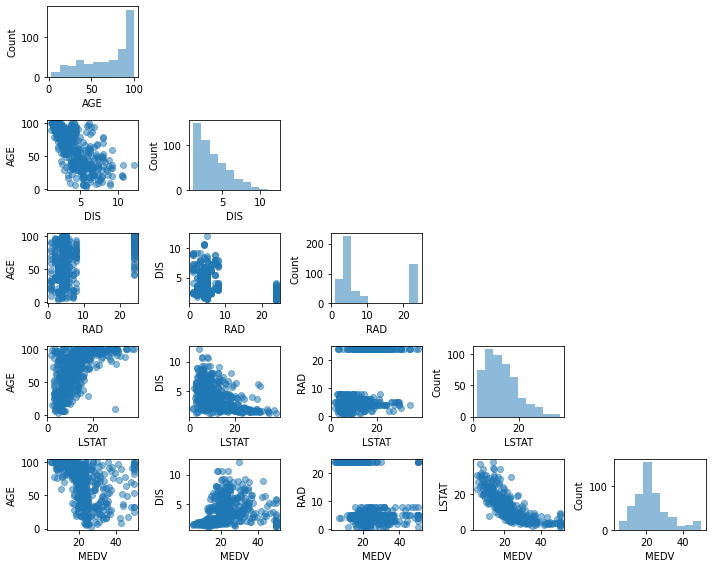

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# 量的変数の一部を抜き出す
cols = [
    'AGE',     # 1940年よりも前に建てられた家屋の割合
    'DIS',     # ボストンの主な5つの雇用圏までの重み付きの距離
    'RAD',     # 幹線道路へのアクセス指数
    'LSTAT',   # 低所得者の割合
    'MEDV',    # 住宅価格の中央値(単位1,000ドル)
]

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

こうしてみると，特にわかりやすい相関がみられる組み合わせとして「AGEとDIS」「LSTATとMEDV」が挙げられる．これらは負の相関がある．

また，散布図行列で作成される対角部分の図表は，ヒストグラムである．例えばこれにより，変数DISが右に裾野の長い分布を取っていて，歪度が正であることも確認できる．

### seabornライブラリを用いた散布図行列の作成

結果としてできる図は同様であるが，比較的使用されることの多いseabornでも散布図行列が簡単に作成できる．

変数として指定するデータがDataFrameである点がMLxtendの場合と異なっている．

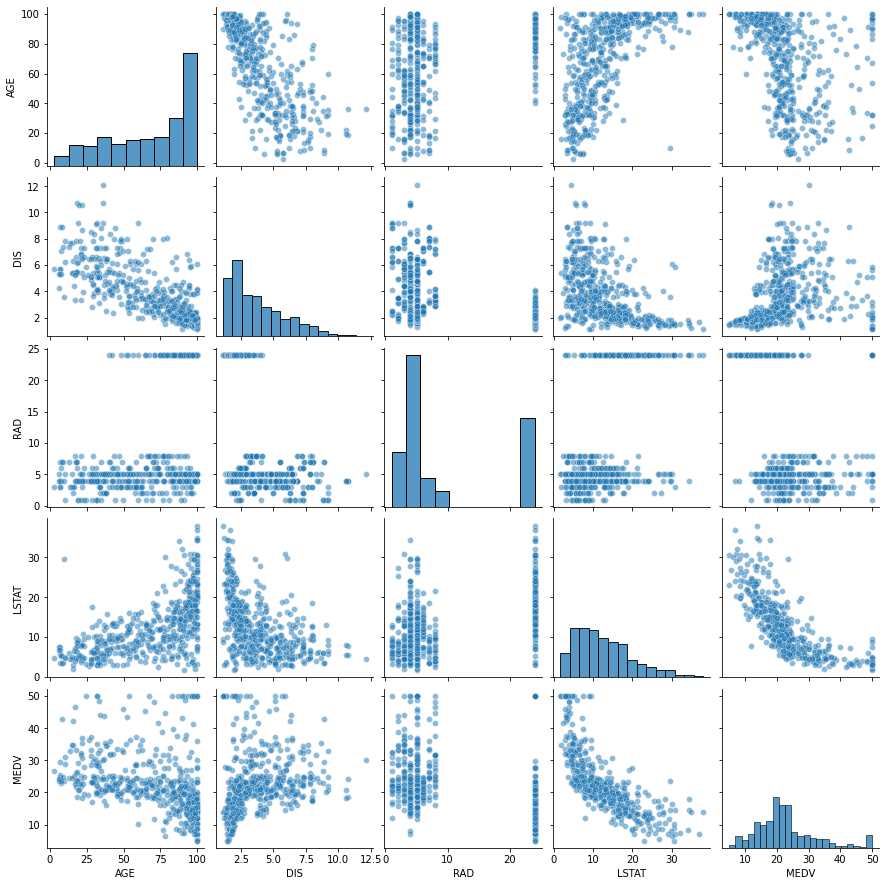

In [3]:
import seaborn as sns

sns.pairplot(df[cols], vars=cols, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.5})

個人的にはこちらのseabornのデザインの方が好みである．

## 参考文献
---

[散布図，なるほど統計学園](https://www.stat.go.jp/naruhodo/9_graph/jyokyu/sanpu.html)

[26-1. 散布図，統計WEB](https://bellcurve.jp/statistics/course/9587.html)

[散布図，Wikipedia](https://ja.wikipedia.org/wiki/%E6%95%A3%E5%B8%83%E5%9B%B3)

[matplotlib.pyplot.scatter，Matplotlib 3.5.1 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

[Scatter Plot Matrix，mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/scatterplotmatrix/)

[seaborn.pairplot，seaborn 0.11.2 documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

[housing.data，github rasbt](https://github.com/rasbt/python-machine-learning-book/blob/master/code/datasets/housing/housing.data)

[基本的な正規表現一覧，murashun.jp](https://murashun.jp/article/programming/regular-expression.html)